In [145]:
import numpy as np
import math as m
import time
import matplotlib.pyplot as plt
np.random.seed(1)

In [146]:
def relu(x):
    return (x > 0) * x

def relu_grad(x): #returns false if x < 0
    return x > 0

In [147]:
streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1],
                         [1, 0, 1]])

In [148]:
streetlights

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 0, 1]])

In [149]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])
walk_vs_stop

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [150]:
X, y = streetlights, walk_vs_stop

In [151]:
hidden_nodes = 8

In [152]:
epochs = 1000  # number of iterations to go through the network

lr = 0.01  # how much we change the weights of the network each iteration

In [153]:
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5  #rand(3,8) from -0.5 to 0.5
ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5  # rand(8,1)

In [154]:
ws_1

array([[-0.082978  ,  0.22032449, -0.49988563, -0.19766743, -0.35324411,
        -0.40766141, -0.31373979, -0.15443927],
       [-0.10323253,  0.03881673, -0.08080549,  0.1852195 , -0.29554775,
         0.37811744, -0.47261241,  0.17046751],
       [-0.0826952 ,  0.05868983, -0.35961306, -0.30189851,  0.30074457,
         0.46826158, -0.18657582,  0.19232262]])

In [155]:
ws_2

array([[ 0.37638915],
       [ 0.39460666],
       [-0.41495579],
       [-0.46094522],
       [-0.33016958],
       [ 0.3781425 ],
       [-0.40165317],
       [-0.07889237]])

In [156]:
errors = []
for epoch in range(epochs):  #number of training iterations, or times to change the weights of the nn
    for i in range(X.shape[0]):  #for all samples in X, each streetlight
        layer_in = X[i:i + 1]

        #forward pass/prediction
        layer_1 = relu(layer_in.dot(ws_1))
        layer_out = layer_1.dot(ws_2)

        #calc error/distance (how far are we from goal)
        delta_2 = layer_out - y[i:i + 1]

        #calc the error each node in prev layer contributed
        delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1) # var tidligere relu_grad

        #update weights
        ws_2 -= lr * (layer_1.T.reshape(hidden_nodes, 1).dot(delta_2))
        ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))


    if epoch % 10 == 0:  # at every tenth instance
        error = delta_2 ** 2
        errors.append(error[0][0])
        # print(round(error[0][0], 6))  #, end='\r')

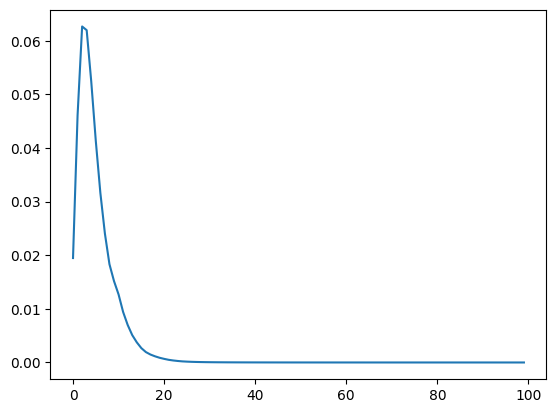

In [157]:

plt.plot(errors)